Text(0.5, 1.0, 'Profil Konsentrasi A di Badan Penjerap')

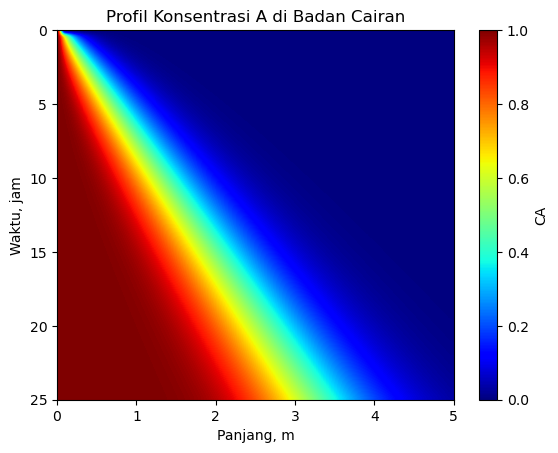

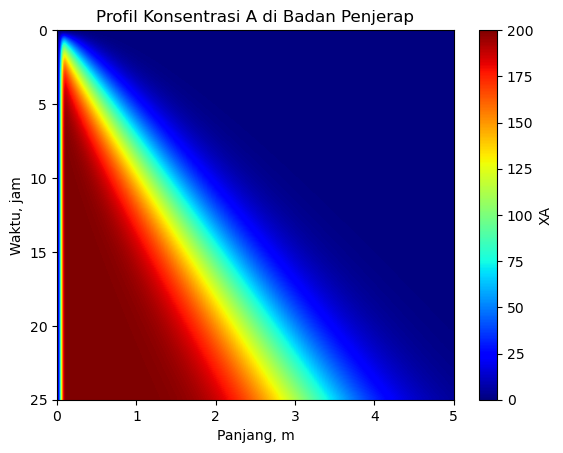

In [14]:
#Nama : Liska Dewi Muktiarani
#NIM  : 21/477837/TK/52633

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as sol
from matplotlib.animation import FuncAnimation

#Data Perhitungan 
Cai = 1 #mol/m3 
F0 = 36000 #m3/jam 
L = 5 #m 
d = 1.5 #m 
eps_b = 0.7 
alfa = 100 #m2/m3 
kc = 1800 #m/jam 
rho_b = 800 #kg/m3 
H = 0.005 #m3/kg 
De = 1.8e-4 #m2/jam 
Nz = 101 
z = np.linspace(0,L,Nz) 
dz = z[1]-z[0] 
t_final = 25 
Nt = 101 
tspan = np.linspace(0,t_final,Nt) 
dt = tspan[1]-tspan[0]
tbound = [0, t_final]

#Matriks Initial
Cinit = np.zeros(2*Nz)

#Subroutine
def fun(t, C):
    CA = C[0:Nz]
    XA = C[Nz:2*Nz]
    #Batas Kiri
    CA[0] = Cai
    XA[0] = 0
    #Batas Kanan
    CA[-1] = 1/3*(4*CA[-2]-CA[-3])
    XA[-1] = 1/3*(4*XA[-2]-XA[-3])
    dCdt = np.zeros(len(C))
    for i in range(1,Nz-1):
        dCdt[i] = De/eps_b*(CA[i+1]-2*CA[i]+CA[i-1])/(dz**2)-F0/(np.pi/4*d**2*De)*(CA[i+1]-CA[i-1])/2/dz-kc*alfa/De*(CA[i]-XA[i]*H)
        dCdt[i+Nz] = kc*alfa/rho_b*(CA[i]-XA[i]*H)
    return dCdt

#Solver
solver = sol(fun, tbound, Cinit, t_eval=tspan, method='LSODA')
res = solver.y.T

#Recalculation
#CA
CA = res[:,0:Nz]
CA[:,0] = Cai
CA[:,-1] = 1/3*(4*CA[:,-2]-CA[:,-3])
#XA
XA = res[:,Nz:2*Nz]
XA[:,0] = 0
XA[:,-1] = 1/3*(4*XA[:,-2]-XA[:,-3])

#Plotting
plt.figure(0)
plt.imshow(CA,cmap='jet',extent=(0,L,t_final,0),aspect='auto', interpolation='bicubic')
plt.ylabel('Waktu, jam')
plt.xlabel('Panjang, m')
plt.title('Profil Konsentrasi A di Badan Cairan')
plt.colorbar(label='CA')

plt.figure(1)
plt.imshow(XA, cmap='jet', extent=(0,L,t_final,0), aspect='auto', interpolation='bicubic')
plt.colorbar(label='XA')
plt.ylabel('Waktu, jam')
plt.xlabel('Panjang, m')
plt.title('Profil Konsentrasi A di Badan Penjerap')



#Pembahasan
Konsentrasi A di badan cairan pada setiap posisi akan terus menerus meningkat seiring waktu berjalan karena adanya proses adsorbsi atau perpindahan massa A dari badan cairan menuju bahan padatan. Begitu juga halnya dengan grafik konsentrasi A di penjerap. Pada awalnya (t = 0 jam), konsentrasi A di seluruh posisi penjerap bernilai 0. Seiring waktu berjalan terjadi proses adsorbsi komponen A dari bacan cairan menuju penjerap hingga tercapai kondisi jenuhnya. 

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 640x480 with 0 Axes>

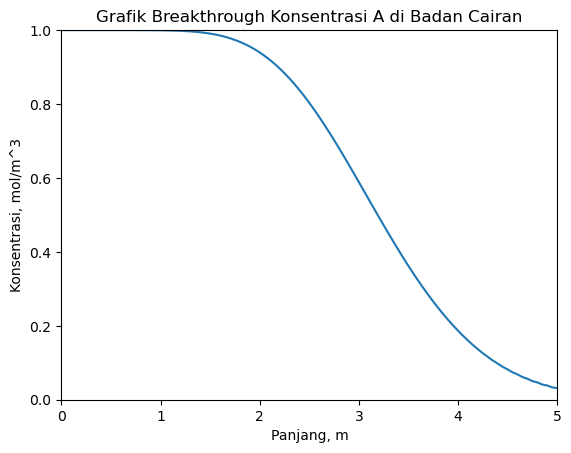

MovieWriter ffmpeg unavailable; using Pillow instead.


<Figure size 640x480 with 0 Axes>

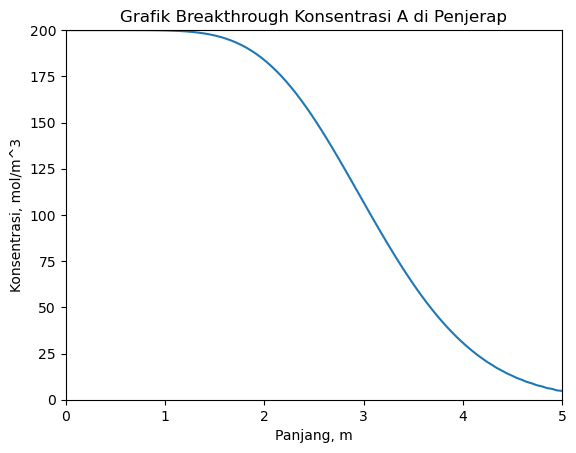

In [15]:
#CA
plt.figure(2)
fig, ax = plt.subplots()
ax.set_title('Grafik Breakthrough Konsentrasi A di Badan Cairan') 
ax.set_xlabel('Panjang, m')
ax.set_ylabel('Konsentrasi, mol/m^3')
ln, = plt.plot([], [])
def init():
    ax.set_xlim(0,L)
    ax.set_ylim(0,1)
    return ln,
def update(i):
    xdata =(np.linspace(0,L,Nz-1))
    ydata =(CA[i,1:])
    ln.set_data(xdata, ydata)
    return ln,
ani = FuncAnimation(fig,update,frames=100,interval=20,init_func=init,blit=True)
ani.save('CA Breakthorugh.gif',writer='ffmpeg')
plt.show()

#XA
plt.figure(3)
fig1,ax1=plt.subplots()
ax1.set_title('Grafik Breakthrough Konsentrasi A di Penjerap')
ax1.set_xlabel('Panjang, m')
ax1.set_ylabel('Konsentrasi, mol/m^3')
ln1,=plt.plot([],[])
def init1():
    ax1.set_xlim(0,L)
    ax1.set_ylim(0,200)
    return ln,
def update1(i):
    xdata1 =(np.linspace(0,L,Nz-1))
    ydata1 =(XA[i,1:])
    ln1.set_data(xdata1,ydata1)
    return ln1,
ani=FuncAnimation(fig1,update1,frames=100,interval=20,init_func=init1,blit=True)
ani.save('XA Breakthrough.gif', writer = 'ffmpeg')
plt.show()